In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_digits(return_X_y=True)

In [3]:
X_label, X_test, y_label, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
X_label.shape, X_test.shape, y_label.shape, y_test.shape

((1527, 64), (270, 64), (1527,), (270,))

In [23]:
N = 500

In [24]:
clf = GaussianNB().fit(X_label[:N, :], y_label[:N])

In [25]:
new_label = np.concatenate([y_label[:N], 
                            clf.predict(X_label[N:, :])])

In [26]:
clf.fit(X_label, new_label)

GaussianNB()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_true=y_test,
               y_pred=clf.predict(X_test))

0.8296296296296296

In [29]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [30]:
from sklearn.datasets import make_moons

In [31]:
X, y = make_moons(n_samples=2000)

In [53]:
y

array([0, 0, 0, ..., 0, 1, 1])

In [35]:
new_y = y.copy()

In [37]:
new_y[1:-1] = -1

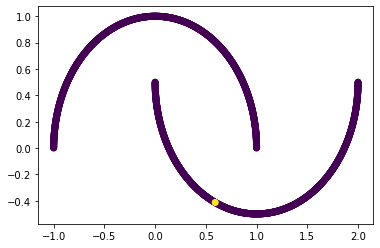

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=new_y);

In [40]:
new_y

array([ 0, -1, -1, ..., -1, -1,  1])

In [48]:
lp = LabelPropagation(kernel='knn', n_neighbors=4)
ls = LabelSpreading(kernel='knn', n_neighbors=2)

In [49]:
lp.fit(X, new_y)

LabelPropagation(kernel='knn', n_neighbors=4)

In [50]:
ls.fit(X, new_y)

LabelSpreading(kernel='knn', n_neighbors=2)

In [51]:
accuracy_score(y_true=y, y_pred=lp.predict(X))

1.0

In [52]:
accuracy_score(y_true=y, y_pred=ls.predict(X))

/Users/khamir/opt/miniconda3/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


0.502